In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# 表示用の設定を変更します
%matplotlib inline
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.width = 130


In [24]:
price = pd.read_csv("./data/price.csv")

balance = pd.read_csv("./data/balance_sheet.csv")
income = pd.read_csv("./data/income.csv")


income = income[income["fiscalYear"] > 2015]
balance = balance[balance["fiscalYear"] > 2015]

# income["fiscalDate"] = pd.DatetimeIndex(income["fiscalDate"])

# income["fiscalDate"]

# Relation between price and net income

In [13]:
price["label"] = pd.DatetimeIndex(price["label"])

mean_price = price.groupby(["label"])[["fClose"]].mean()


,fClose
label,
2016-04-04,50.58368


In [25]:
mean_income = income.groupby(["fiscalYear", "fiscalQuarter"])[["netIncome", "operatingIncome"]].mean()

# mean_income = mean_income.to_frame()
mean_income.reset_index(inplace=True)

mean_income["year_quarter"] = (mean_income["fiscalYear"].astype(str) + mean_income["fiscalQuarter"].astype(str)).astype(int)

mean_income["netIncome"] = mean_income["netIncome"] / 1000000000

In [42]:
print(sns.color_palette().as_hex())

sns.color_palette()

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

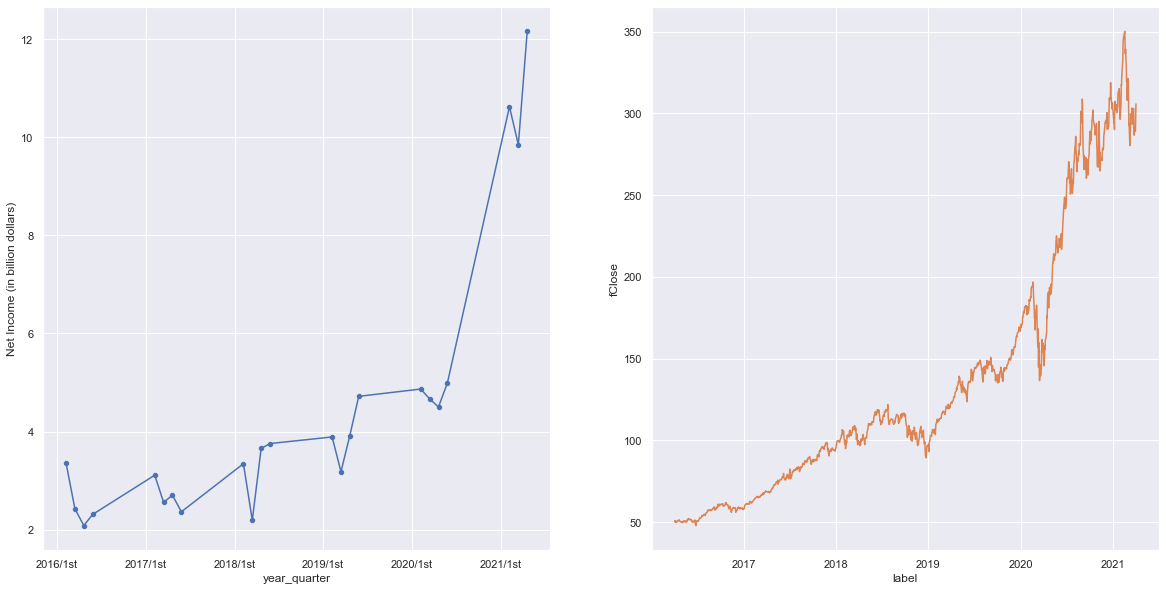

In [81]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))

ax1.set_xticks([20160, 20170, 20180, 20190, 20200, 20210])
ax1.set_xticklabels(["2016/1st", "2017/1st", "2018/1st", "2019/1st","2020/1st", "2021/1st"])
ax1.set_ylabel("Net Income (in billion dollars)")

sns.lineplot(x="year_quarter", y="netIncome", data=mean_income, ax=ax1)
sns.scatterplot(x="year_quarter", y="netIncome", data=mean_income, ax=ax1)
sns.lineplot(x="label", y="fClose", data=mean_price, ax=ax2, color="#dd8452")

sns.set_theme()



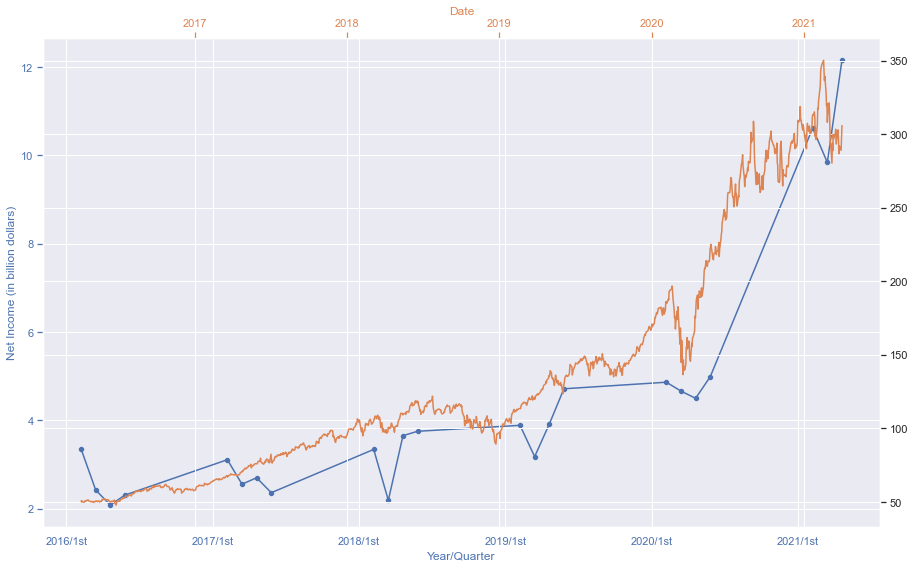

In [75]:
fig, ax1 = plt.subplots(figsize=(15,9))


ax2 = ax1.twinx().twiny()
ax2.set_ylabel("Mean Price", color="#dd8452")
ax2.set_xlabel("Date", color="#dd8452")

# ax1 ----------------------------------------------------------------------------------------------------------
ax1.set_xticks([20160, 20170, 20180, 20190, 20200, 20210])
ax1.set_xticklabels(["2016/1st", "2017/1st", "2018/1st", "2019/1st","2020/1st", "2021/1st"], color='#4c72b0')
ax1.tick_params(axis="y", colors="#4c72b0")
ax1.set_xlabel("Year/Quarter", color='#4c72b0')

ax1.set_ylabel("Net Income (in billion dollars)", color='#4c72b0')
# ax1.set_xticklabels(color="blue")


# ax2 ----------------------------------------------------------------------------------------------------------

# ax2.set_xticks(["2016/04/01", 2017, 2018, 2019, 2020, 2021])
ax2.set_xticklabels(["2016", "2017", "2018", "2019","2020", "2021"])
ax2.tick_params(axis="both", colors="#dd8452")


sns.lineplot(x="year_quarter", y="netIncome", data=mean_income, ax=ax1)
sns.scatterplot(x="year_quarter", y="netIncome", data=mean_income, ax=ax1)
sns.lineplot(x="label", y="fClose", data=mean_price, ax=ax2, color="#dd8452")

sns.set_theme()

